In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit
import emcee
import corner

In [4]:
from __future__ import unicode_literals

figsize(10,8)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [5]:
freqs = np.array([408e6, 4.575e9, 5.625e9, 6.125e9, 28.5e9, 44.1e9, 70.3e9, 143e9, 217e9, 353e9, 545e9, 857e9])

In [6]:
tflux = np.array([75.8955, 27.213, 27.52, 27.798, 45.446, 42.34, 44.629, 143.5, 621.8, 2580., 8587., 27734])
terrs = 0.2 * tflux

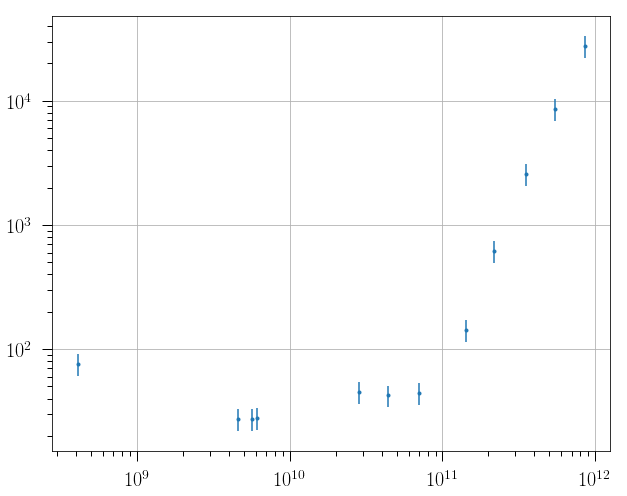

In [7]:
errorbar(freqs, tflux, terrs, fmt='.')
yscale('log')
xscale('log')
grid()

In [8]:
beam = pi*( 1. * pi/180.)**2
beam2 = pi*( (0.16/60.) * pi/180.)**2

In [9]:
def signal(freqs, EM, Asd, nup, Ad, Bd, Td, Acmb, As, alps):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup) 
    ccmb = fg.cmb(freqs, A=Acmb)
    synch = fg.synchrotron(freqs, As=As, alps=alps)
    return (fffit + dustfit + amefit + ccmb + synch) * beam

In [10]:
def signal2(freqs, EM1, EM2, Ad, Bd, Td, abeam, Acmb, As, alps):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000.) * abeam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td) * beam
    ccmb = fg.cmb(freqs, A=Acmb) * beam
    synch = fg.synchrotron(freqs, As=As, alps=alps) * beam
    return fffit + fffit2 + dustfit + ccmb + synch

In [11]:
def signal3(freqs, EM, Ad, Bd, Td, Acmb, As, alps):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td)
    ccmb = fg.cmb(freqs, A=Acmb)
    synch = fg.synchrotron(freqs, As=As, alps=alps)
    return (fffit + dustfit + ccmb + synch) * beam

In [12]:
pn = np.array([1e3, 1e-3, 20e9, 1, 2, 20, 30e-6, 1e3, -1])
bounds = ( [0, 0, 0, 0, 0, 0, -1, 0, -2], [1e4, 1, 1e11, 1, 3, 40, 1, 1e6, 0])
x = curve_fit(signal, freqs, tflux, p0=pn, sigma=terrs, absolute_sigma=True, bounds=bounds)
pfit = x[0]

In [13]:
pn2 = np.array([1e3 , 1e7, 0.1, 2, 20, beam2, 30e-6, 1e3, -1])
bounds2 = ( [0, 1e5, 0, 0, 0, 0, -1., 0, -2], [1e4, 1e9, 1, 3, 40, 1, 1, 1e6, 0])
x = curve_fit(signal2, freqs, tflux, p0=pn2, sigma=terrs, absolute_sigma=True, bounds=bounds2)
pfit2 = x[0]

In [14]:
pn3 = np.array([1e3, 1, 2, 20, 30e-6, 1e3, -1])
bounds3 = ( [0, 0, 0, 0, -1, 0, -2], [1e4, 1, 3, 40, 1, 1e6, 0])
x = curve_fit(signal3, freqs, tflux, p0=pn3, sigma=terrs, absolute_sigma=True, bounds=bounds3)
pfit3 = x[0]

In [15]:
rchisq1 = np.sum( ( tflux - signal(freqs, *pfit))**2 / terrs**2 ) / (len(freqs) - 9.)
rchisq2 = np.sum( ( tflux - signal2(freqs, *pfit2))**2 / terrs**2 ) / (len(freqs) - 9.)
rchisq3 = np.sum( ( tflux - signal3(freqs, *pfit3))**2 / terrs**2 ) / (len(freqs) - 7.)
print rchisq1, rchisq2, rchisq3

0.666777640707 2.42735307319 1.45300307141


In [16]:
print "EM, Asd, nup, Ad, Bd, Td, Acmb, As, alps"
pfit

EM, Asd, nup, Ad, Bd, Td, Acmb, As, alps


array([  1.34994527e+02,   1.21142088e-03,   3.27133029e+10,
         1.10908430e-03,   2.48022691e+00,   9.92700686e+00,
         1.93091771e-04,   3.41966154e+03,  -5.29587286e-01])

In [17]:
print "EM1, EM2, Ad, Bd, Td, abeam, Acmb, As, alps"
pfit2

EM1, EM2, Ad, Bd, Td, abeam, Acmb, As, alps


array([  3.37159670e+02,   6.49284380e+05,   1.08749519e-03,
         2.39386203e+00,   1.11701070e+01,   3.90873306e-14,
         1.86232957e-04,   1.03586546e+00,  -1.91606945e+00])

In [18]:
print "EM, Ad, Bd, Td, Acmb, As, alps"
pfit3

EM, Ad, Bd, Td, Acmb, As, alps


array([  3.38243920e+02,   1.08722446e-03,   2.39005900e+00,
         1.11898312e+01,   1.85392732e-04,   7.28475109e-01,
        -1.97986692e+00])

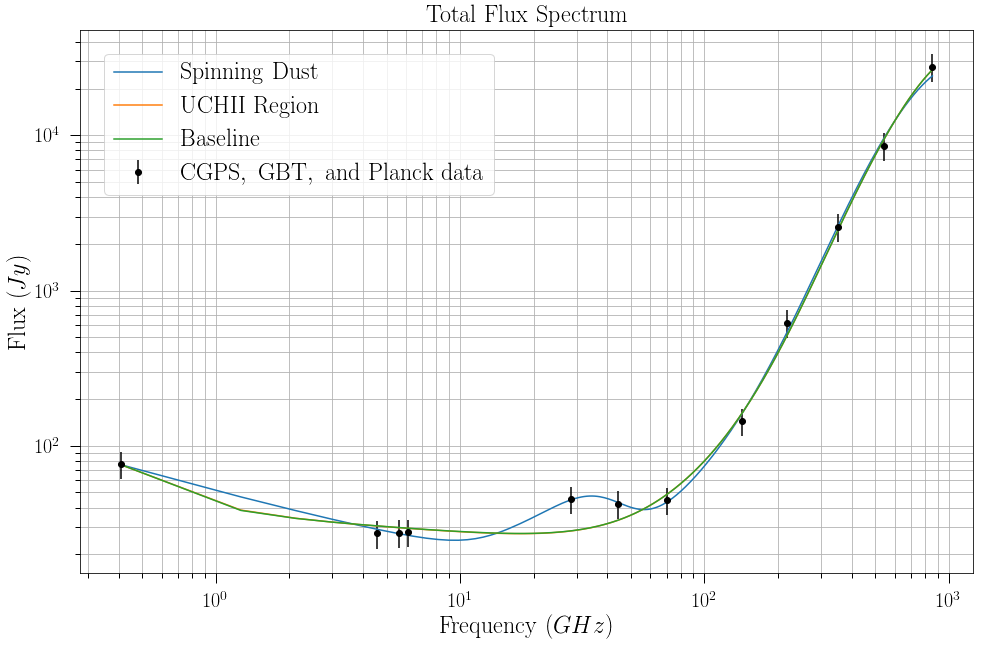

In [19]:
figure(figsize=(16,10))
nu = np.linspace(freqs[0], freqs[-1], 1000)
plot(nu*1e-9, signal(nu, *pfit), label='$\mathrm{Spinning\ Dust}$')
plot(nu*1e-9, signal2(nu, *pfit2), label='$\mathrm{UCHII\ Region}$')
plot(nu*1e-9, signal3(nu, *pfit3), label='$\mathrm{Baseline}$')
errorbar(freqs*1e-9, tflux, yerr=terrs, fmt='ko',label='$\mathrm{CGPS,\ GBT,\ and\ Planck\ data}$')

xscale('log')
yscale('log')
xlabel('$\mathrm{Frequency}\ (GHz)$')
ylabel('$\mathrm{Flux}\ (Jy)$')
legend(loc=2, ncol=1)
grid()
#ylim(1e-1, 1e5)
grid(which='minor')
title('$\mathrm{Total\ Flux\ Spectrum}$')
#savefig('../notebooks/fullspectrum_withspinningdust')